In [ ]:
import pandas as pd
from scipy.signal import savgol_filter, butter, filtfilt

# Load magnetic field data from csv file
df = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - mergeddata (2).csv')

# Extract magnetic field values from data frame
magnetic_field = df[['X-axis', 'Y-axis', 'Z-axis']].values
Beacon_data =df[[ 'Beacon-22', 'Beacon-20', 'Beacon-c8', 'Beacon-2f']].values


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='low')
lp_field = filtfilt(b, a, Beacon_data, axis=0)


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='high')
hp_field = filtfilt(b, a, magnetic_field, axis=0)

# Add smoothed magnetic field data to original data frame
df['Smoothed LP Field X'] = hp_field[:, 0]
df['Smoothed LP Field Y'] = hp_field[:, 1]
df['Smoothed LP Field Z'] = hp_field[:, 2]
df['Smoothed HP Field P'] = lp_field[:, 0]
df['Smoothed HP Field Q'] = lp_field[:, 1]
df['Smoothed HP Field R'] = lp_field[:, 2]
df['Smoothed HP Field S'] = lp_field[:, 3]


# Save smoothed magnetic field data to separate csv files
df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S','Coordinates']].to_csv('smoothed_lp_field.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Convert the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Coordinates'])

# Split the data into features and target
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN predictions
accuracy_knn = accuracy_score(y_test, y_pred_knn, normalize=True)
print('KNN Accuracy:', accuracy_knn)

# Create a weighted k-NN classifier with k=3
wknn = KNeighborsClassifier(n_neighbors=5, weights='distance')
wknn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_wknn = wknn.predict(X_test)

# Calculate the accuracy of the WKNN predictions
accuracy_wknn = accuracy_score(y_test, y_pred_wknn, normalize=True)
print('WKNN Accuracy:', accuracy_wknn)

# Create a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_dtc = dtc.predict(X_test)

# Calculate the accuracy of the decision tree predictions
accuracy_dtc = accuracy_score(y_test, y_pred_dtc, normalize=True)
print('Decision Tree Accuracy:', accuracy_dtc)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_rfc = rfc.predict(X_test)

# Calculate the accuracy of the random forest predictions
accuracy_rfc = accuracy_score(y_test, y_pred_rfc, normalize=True)
print('Random Forest Accuracy:', accuracy_rfc)
# Create an XGBoost classifier with default parameters
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate the accuracy of the XGBoost predictions
accuracy_xgb = accuracy_score(y_test, y_pred_xgb, normalize=True)
print('XGBoost Accuracy:', accuracy_xgb)

# Use the trained classifier to predict the locations of the test


KNN Accuracy: 0.6917960088691796
WKNN Accuracy: 0.7062084257206208
Decision Tree Accuracy: 0.8126385809312638
Random Forest Accuracy: 0.9002217294900222
XGBoost Accuracy: 0.9113082039911308


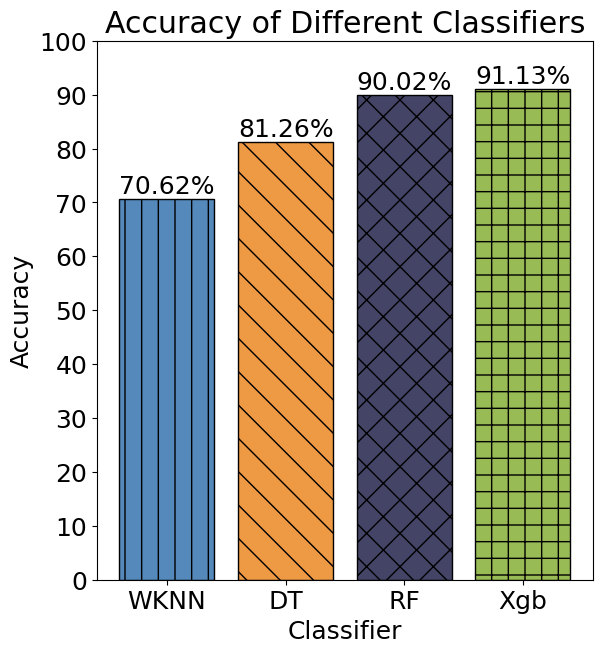

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the accuracies and classifier names
accuracies = [accuracy_wknn*100, accuracy_dtc*100, accuracy_rfc*100, accuracy_xgb*100]
classifiers = ['WKNN', 'DT', 'RF', 'Xgb']

# Define the patterns for each bar
patterns = ['|', '\\', 'x', '+']

# Define the colors using hexadecimal color codes converted to RGB
colors = ['#5588bb', '#ee9944', '#444466', '#99bb55']

# Set the font size
plt.rcParams['font.size'] = 18
# Set the figure size
plt.figure(figsize=(6.4, 7))
# Plot a bar chart of the accuracies with different patterns and colors
for i in range(len(accuracies)):
    plt.bar(classifiers[i], accuracies[i], color=colors[i], edgecolor='black', hatch=patterns[i])

# Set the x-axis and y-axis labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')

# Set the y-axis ticks to increase in steps of 5
plt.yticks(range(0, 100 + 2, 10))

# Add the accuracy values as text on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center')

# Save the plot as an image file
plt.savefig('classifier_accuracies.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# Convert the predicted and test arrays to 1-dimensional arrays
y_pred_knn = np.ravel(y_pred_knn)
y_test = np.ravel(y_test)

# Print misclassifications for KNN
for i in range(len(y_pred_knn)):
    if y_pred_knn[i] != y_test[i]:
        print('KNN misclassification:', le.inverse_transform([y_pred_knn[i]])[0], 'predicted as', le.inverse_transform([y_test[i]])[0])

# Convert the predicted and test arrays to 1-dimensional arrays
y_pred_wknn = np.ravel(y_pred_wknn)
y_test = np.ravel(y_test)

# Print misclassifications for WKNN
for i in range(len(y_pred_wknn)):
    if y_pred_wknn[i] != y_test[i]:
        print('WKNN misclassification:', le.inverse_transform([y_pred_wknn[i]])[0], 'predicted as', le.inverse_transform([y_test[i]])[0])

# Convert the predicted and test arrays to 1-dimensional arrays
y_pred_dtc = np.ravel(y_pred_dtc)
y_test = np.ravel(y_test)

# Print misclassifications for Decision Tree
for i in range(len(y_pred_dtc)):
    if y_pred_dtc[i] != y_test[i]:
        print('Decision Tree misclassification:', le.inverse_transform([y_pred_dtc[i]])[0], 'predicted as', le.inverse_transform([y_test[i]])[0])

# Convert the predicted and test arrays to 1-dimensional arrays
y_pred_rfc = np.ravel(y_pred_rfc)
y_test = np.ravel(y_test)

# Print misclassifications for Random Forest
for i in range(len(y_pred_rfc)):
    if y_pred_rfc[i] != y_test[i]:
        print('Random Forest misclassification:', le.inverse_transform([y_pred_rfc[i]])[0], 'predicted as', le.inverse_transform([y_test[i]])[0])

# Convert the predicted and test arrays to 1-dimensional arrays
y_pred_xgb = np.ravel(y_pred_xgb)
y_test = np.ravel(y_test)

# Print misclassifications for XGBoost
for i in range(len(y_pred_xgb)):
    if y_pred_xgb[i] != y_test[i]:
        print('XGBoost misclassification:', le.inverse_transform([y_pred_xgb[i]])[0], 'predicted as', le.inverse_transform([y_test[i]])[0])


KNN misclassification: Y predicted as X
KNN misclassification: m predicted as n
KNN misclassification: g predicted as d
KNN misclassification: E predicted as F
KNN misclassification: L predicted as D
KNN misclassification: T predicted as S
KNN misclassification: m predicted as l
KNN misclassification: n predicted as m
KNN misclassification: g predicted as f
KNN misclassification: R predicted as Q
KNN misclassification: W predicted as V
KNN misclassification: S predicted as R
KNN misclassification: R predicted as Q
KNN misclassification: S predicted as U
KNN misclassification: Y predicted as Z
KNN misclassification: S predicted as R
KNN misclassification: e predicted as d
KNN misclassification: U predicted as T
KNN misclassification: t predicted as s
KNN misclassification: Y predicted as X
KNN misclassification: T predicted as U
KNN misclassification: f predicted as g
KNN misclassification: m predicted as l
KNN misclassification: Z predicted as a
KNN misclassification: d predicted as c


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Define the reference points as a 7x7 NumPy array
ref_points = np.array([['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                       ['H', 'I', 'J', 'K', 'L', 'M', 'N'],
                       ['O', 'P', 'Q', 'R', 'S', 'T', 'U'],
                       ['V', 'W', 'X', 'Y', 'Z', 'a', 'b'],
                       ['c', 'd', 'e', 'f', 'g', 'h', 'i'],
                       ['j', 'k', 'l', 'm', 'n', 'o', 'p'],
                       ['q', 'r', 's', 't', 'u', 'v', 'w']])

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Convert the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Coordinates'])

# Split the data into features and target
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_knn = knn.predict(X_test)

# Modify predictions that are neighbors of the actual location
for i, y_pred in enumerate(y_pred_knn):
    actual_location = y_test[i]
    if y_pred != actual_location:
        actual_location_row, actual_location_col = np.where(ref_points == le.inverse_transform([actual_location])[0])
        pred_location_row, pred_location_col = np.where(ref_points == le.inverse_transform([y_pred])[0])
        if abs(actual_location_row - pred_location_row) <= 1 and abs(actual_location_col - pred_location_col) <= 1:
            y_pred_knn[i] = actual_location

# Calculate the accuracy of the KNN predictions
accuracy_knn1 = accuracy_score(y_test, y_pred_knn, normalize=True)
print('KNN Accuracy:', accuracy_knn1)


#weighted knn
wknn = KNeighborsClassifier(n_neighbors=5, weights='distance')
wknn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_wknn = wknn.predict(X_test)

for i, y_pred in enumerate(y_pred_wknn):
  actual_location = y_test[i]
  if y_pred != actual_location:
    actual_location_row, actual_location_col = np.where(ref_points == le.inverse_transform([actual_location])[0])
    pred_location_row, pred_location_col = np.where(ref_points == le.inverse_transform([y_pred])[0])
    if abs(actual_location_row - pred_location_row) <= 1 and abs(actual_location_col - pred_location_col) <= 1:
      y_pred_wknn[i] = actual_location

accuracy_wknn1 = accuracy_score(y_test, y_pred_wknn, normalize=True)
print('Weighted KNN Accuracy:', accuracy_wknn1)


# Create a Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=100, random_state=42)
dt.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_dt = dt.predict(X_test)

# Modify predictions that are neighbors of the actual location
for i, y_pred in enumerate(y_pred_dt):
    actual_location = y_test[i]
    if y_pred != actual_location:
        actual_location_row, actual_location_col = np.where(ref_points == le.inverse_transform([actual_location])[0])
        pred_location_row, pred_location_col = np.where(ref_points == le.inverse_transform([y_pred])[0])
        if abs(actual_location_row - pred_location_row) <= 1 and abs(actual_location_col - pred_location_col) <= 1:
            y_pred_dt[i] = actual_location

# Calculate the accuracy of the Decision Tree predictions
accuracy_dt1 = accuracy_score(y_test, y_pred_dt, normalize=True)
print('Decision Tree Accuracy:', accuracy_dt1)

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_rf = rf.predict(X_test)

# Modify predictions that are neighbors of the actual location
for i, y_pred in enumerate(y_pred_rf):
    actual_location = y_test[i]
    if y_pred != actual_location:
        actual_location_row, actual_location_col = np.where(ref_points == le.inverse_transform([actual_location])[0])
        pred_location_row, pred_location_col = np.where(ref_points == le.inverse_transform([y_pred])[0])
        if abs(actual_location_row - pred_location_row) <= 1 and abs(actual_location_col - pred_location_col) <= 1:
            y_pred_rf[i] = actual_location

# Calculate the accuracy of the Random Forest predictions
accuracy_rf1 = accuracy_score(y_test, y_pred_rf, normalize=True)
print('Random Forest Accuracy:', accuracy_rf1)

# Create an XGBoost classifier with default parameters
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Modify predictions that are neighbors of the actual location
for i, y_pred in enumerate(y_pred_xgb):
    actual_location = y_test[i]
    if y_pred != actual_location:
        actual_location_row, actual_location_col = np.where(ref_points == le.inverse_transform([actual_location])[0])
        pred_location_row, pred_location_col = np.where(ref_points == le.inverse_transform([y_pred])[0])
        if abs(actual_location_row - pred_location_row) <= 1 and abs(actual_location_col - pred_location_col) <= 1:
            y_pred_xgb[i] = actual_location

# Calculate the accuracy of the XGBoost predictions
accuracy_xgb1 = accuracy_score(y_test, y_pred_xgb, normalize=True)
print('XGBoost Accuracy:', accuracy_xgb1)


KNN Accuracy: 0.975609756097561
Weighted KNN Accuracy: 0.9711751662971175
Decision Tree Accuracy: 0.9512195121951219
Random Forest Accuracy: 0.9889135254988913
XGBoost Accuracy: 0.9822616407982262


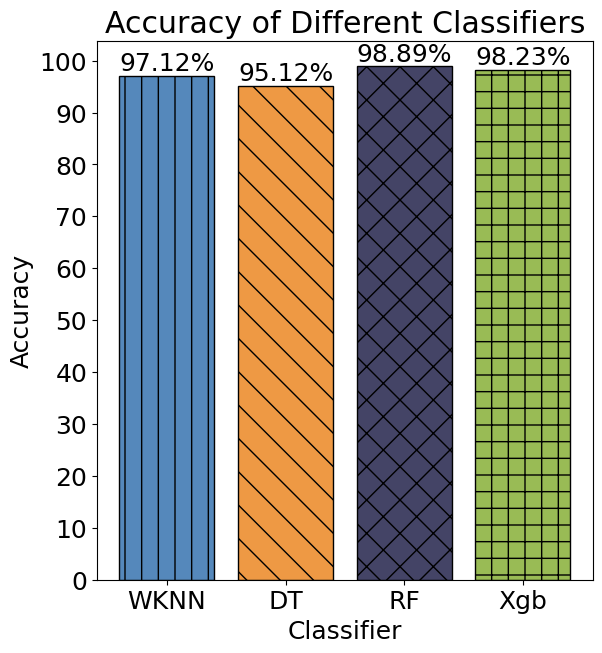

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the accuracies and classifier names
accuracies = [accuracy_wknn1*100, accuracy_dt1*100, accuracy_rf1*100,accuracy_xgb1*100]
classifiers = ['WKNN', 'DT','RF','Xgb']

# Define the patterns for each bar
patterns = ['|', '\\', 'x', '+']

# Define the colors using hexadecimal color codes converted to RGB
colors = ['#5588bb', '#ee9944', '#444466', '#99bb55']

# Set the font size
plt.rcParams['font.size'] = 18
# Set the figure size
plt.figure(figsize=(6.4, 7))
# Plot a bar chart of the accuracies with different patterns and colors
for i in range(len(accuracies)):
    plt.bar(classifiers[i], accuracies[i], color=colors[i], edgecolor='black', hatch=patterns[i])

# Set the x-axis and y-axis labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')

# Set the y-axis ticks to increase in steps of 5
plt.yticks(range(0, 100+2, 10))

# Add the accuracy values as text on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center')

# Save the plot as an image file
plt.savefig('classifier_accuracies1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [ ]:
import pandas as pd
from scipy.signal import savgol_filter, butter, filtfilt

# Load magnetic field data from csv file
df = pd.read_csv('/content/original_all_data_in_this_file_ground_floor - mergeddata (2).csv')

# Extract magnetic field values from data frame
magnetic_field = df[['X-axis', 'Y-axis', 'Z-axis']].values
Beacon_data =df[[ 'Beacon-22', 'Beacon-20', 'Beacon-c8', 'Beacon-2f']].values


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='low')
lp_field = filtfilt(b, a, Beacon_data, axis=0)


# Apply low-pass filter
fs = 70.0  # Sampling frequency (Hz)
cutoff_freq = 2.0  # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(3, normalized_cutoff_freq, btype='high')
hp_field = filtfilt(b, a, magnetic_field, axis=0)

# Add smoothed magnetic field data to original data frame
df['Smoothed LP Field X'] = hp_field[:, 0]
df['Smoothed LP Field Y'] = hp_field[:, 1]
df['Smoothed LP Field Z'] = hp_field[:, 2]
df['Smoothed HP Field P'] = lp_field[:, 0]
df['Smoothed HP Field Q'] = lp_field[:, 1]
df['Smoothed HP Field R'] = lp_field[:, 2]
df['Smoothed HP Field S'] = lp_field[:, 3]


# Save smoothed magnetic field data to separate csv files
df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
    'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S','Coordinates']].to_csv('smoothed_lp_field.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Convert the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Coordinates'])

# Split the data into features and target
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
        'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Create a k-NN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the validation data
y_pred_val_knn = knn.predict(X_val)

# Calculate the accuracy of the KNN predictions on validation data
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
print('KNN Validation Accuracy:', accuracy_val_knn)

# Use the trained classifier to predict the locations of the test data
y_pred_test_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN predictions on test data
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print('KNN Test Accuracy:', accuracy_test_knn)

# Create a weighted k-NN classifier with k=5
wknn = KNeighborsClassifier(n_neighbors=5, weights='distance')
wknn.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the validation data
y_pred_val_wknn = wknn.predict(X_val)

# Calculate the accuracy of the WKNN predictions on validation data
accuracy_val_wknn = accuracy_score(y_val, y_pred_val_wknn)
print('WKNN Validation Accuracy:', accuracy_val_wknn)

# Use the trained classifier to predict the locations of the test data
y_pred_test_wknn = wknn.predict(X_test)

# Calculate the accuracy of the WKNN predictions on test data
accuracy_test_wknn = accuracy_score(y_test, y_pred_test_wknn)
print('WKNN Test Accuracy:', accuracy_test_wknn)

# Create a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the validation data
y_pred_val_dtc = dtc.predict(X_val)

# Calculate the accuracy of the decision tree predictions on validation data
accuracy_val_dtc = accuracy_score(y_val, y_pred_val_dtc)
print('Decision Tree Validation Accuracy:', accuracy_val_dtc)

# Use the trained classifier to predict the locations of the test data
y_pred_test_dtc = dtc.predict(X_test)

# Calculate the accuracy of the decision tree predictions on test data
accuracy_test_dtc = accuracy_score(y_test, y_pred_test_dtc)
print('Decision Tree Test Accuracy:', accuracy_test_dtc)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the validation data
y_pred_val_rfc = rfc.predict(X_val)

# Calculate the accuracy of the random forest predictions on validation data
accuracy_val_rfc = accuracy_score(y_val, y_pred_val_rfc)
print('Random Forest Validation Accuracy:', accuracy_val_rfc)

# Use the trained classifier to predict the locations of the test data
y_pred_test_rfc = rfc.predict(X_test)

# Calculate the accuracy of the random forest predictions on test data
accuracy_test_rfc = accuracy_score(y_test, y_pred_test_rfc)
print('Random Forest Test Accuracy:', accuracy_test_rfc)

# Create an XGBoost classifier with default parameters
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Use the trained classifier to predict the locations of the validation data
y_pred_val_xgb = xgb_clf.predict(X_val)

# Calculate the accuracy of the XGBoost predictions on validation data
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
print('XGBoost Validation Accuracy:', accuracy_val_xgb)

# Use the trained classifier to predict the locations of the test data
y_pred_test_xgb = xgb_clf.predict(X_test)

# Calculate the accuracy of the XGBoost predictions on test data
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
print('XGBoost Test Accuracy:', accuracy_test_xgb)


KNN Validation Accuracy: 0.6622296173044925
KNN Test Accuracy: 0.6779379157427938
WKNN Validation Accuracy: 0.677759290072102
WKNN Test Accuracy: 0.6967849223946785
Decision Tree Validation Accuracy: 0.7947864669994453
Decision Tree Test Accuracy: 0.7987804878048781
Random Forest Validation Accuracy: 0.8508042151968941
Random Forest Test Accuracy: 0.8675166297117517
XGBoost Validation Accuracy: 0.9046034387132557
XGBoost Test Accuracy: 0.8902439024390244


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('/content/smoothed_lp_field.csv')

# Remove rows with missing values
df.dropna(inplace=True)

# Convert the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Coordinates'])

# Split the data into features and target
X = df[['Smoothed LP Field X', 'Smoothed LP Field Y', 'Smoothed LP Field Z',
        'Smoothed HP Field P','Smoothed HP Field Q','Smoothed HP Field R','Smoothed HP Field S']]

# Create a k-NN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Perform cross-validation for KNN
cv_scores_knn = cross_val_score(knn, X, y, cv=5)

# Print the cross-validation scores for KNN
print("KNN Cross-Validation Scores:", cv_scores_knn)
print("KNN Average Cross-Validation Accuracy:", np.mean(cv_scores_knn))

# Create a weighted k-NN classifier with k=5
wknn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Perform cross-validation for WKNN
cv_scores_wknn = cross_val_score(wknn, X, y, cv=5)

# Print the cross-validation scores for WKNN
print("WKNN Cross-Validation Scores:", cv_scores_wknn)
print("WKNN Average Cross-Validation Accuracy:", np.mean(cv_scores_wknn))

# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Perform cross-validation for Decision Tree
cv_scores_dtc = cross_val_score(dtc, X, y, cv=5)

# Print the cross-validation scores for Decision Tree
print("Decision Tree Cross-Validation Scores:", cv_scores_dtc)
print("Decision Tree Average Cross-Validation Accuracy:", np.mean(cv_scores_dtc))

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Perform cross-validation for Random Forest
cv_scores_rfc = cross_val_score(rfc, X, y, cv=5)

# Print the cross-validation scores for Random Forest
print("Random Forest Cross-Validation Scores:", cv_scores_rfc)
print("Random Forest Average Cross-Validation Accuracy:", np.mean(cv_scores_rfc))

# Create an XGBoost classifier with default parameters
xgb_clf = xgb.XGBClassifier()

# Perform cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_clf, X, y, cv=5)

# Print the cross-validation scores for XGBoost
print("XGBoost Cross-Validation Scores:", cv_scores_xgb)
print("XGBoost Average Cross-Validation Accuracy:", np.mean(cv_scores_xgb))


KNN Cross-Validation Scores: [0.61308204 0.81641708 0.83860233 0.76372712 0.84137549]
KNN Average Cross-Validation Accuracy: 0.7746408117537535
WKNN Cross-Validation Scores: [0.6075388  0.84359401 0.85191348 0.77204659 0.84082085]
WKNN Average Cross-Validation Accuracy: 0.7831827466663717
Decision Tree Cross-Validation Scores: [0.56873614 0.77703827 0.84248475 0.73710483 0.80698835]
Decision Tree Average Cross-Validation Accuracy: 0.7464704674274092
Random Forest Cross-Validation Scores: [0.63691796 0.86189684 0.89905713 0.80754298 0.90626733]
Random Forest Average Cross-Validation Accuracy: 0.8223364483682654
XGBoost Cross-Validation Scores: [0.67184035 0.90626733 0.92512479 0.87298946 0.9234609 ]
XGBoost Average Cross-Validation Accuracy: 0.8599365679029655
